# Cab Booking System (E.D.A. and Regression based project)

Cab booking system is the process where renting a cab is automated through an app
throughout a city. Using this app, people can book a cab from one location to another location.
Being a cab booking app company, exploiting the understanding of cab supply and demand
could increase the efficiency of their service and enhance user experience by minimizing
waiting time.

Objective of this project is to combine historical usage pattern along with the open data sources
like weather data to forecast cab booking demand in a city.

You will be provided with hourly renting data span of two years. 
Data is randomly divided into train and test set. 
You must predict the total count of cabs booked in each hour covered by the
test set, using the information available prior to the booking period. You need to append the
train_label dataset to train.csv as ‘Total_booking’ column.


## **Dataset Description**
Please find the descriptions of the columns present in the dataset as below.
* datetime - hourly date + timestamp
* season - spring, summer, autumn, winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - Clear , Cloudy, Light Rain, Heavy temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* Total_booking - number of total booking (target column)

# Tasks

Following are the tasks i performed while executing the project:

**Task 1:**
1. Visualize data using different visualizations to generate interesting insights.
2. Outlier Analysis
3. Missing value analysis
4. Visualizing Total_booking Vs other features to generate insights
5. Correlation Analysis

**Task 2:**
1. Feature Engineering
2. Regression Analysis 
3. Grid search 
4. Ensemble Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
train_l = pd.read_csv("train_label.csv",header=None)

test = pd.read_csv("test.csv")
test_l = pd.read_csv("test_label.csv",header=None)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [2]:
train["Total_booking"] = train_l 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [3]:
test["Total_booking"]= test_l
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


## Task 1:

1.**Visualize data using different visualizations to generate interesting insights.**

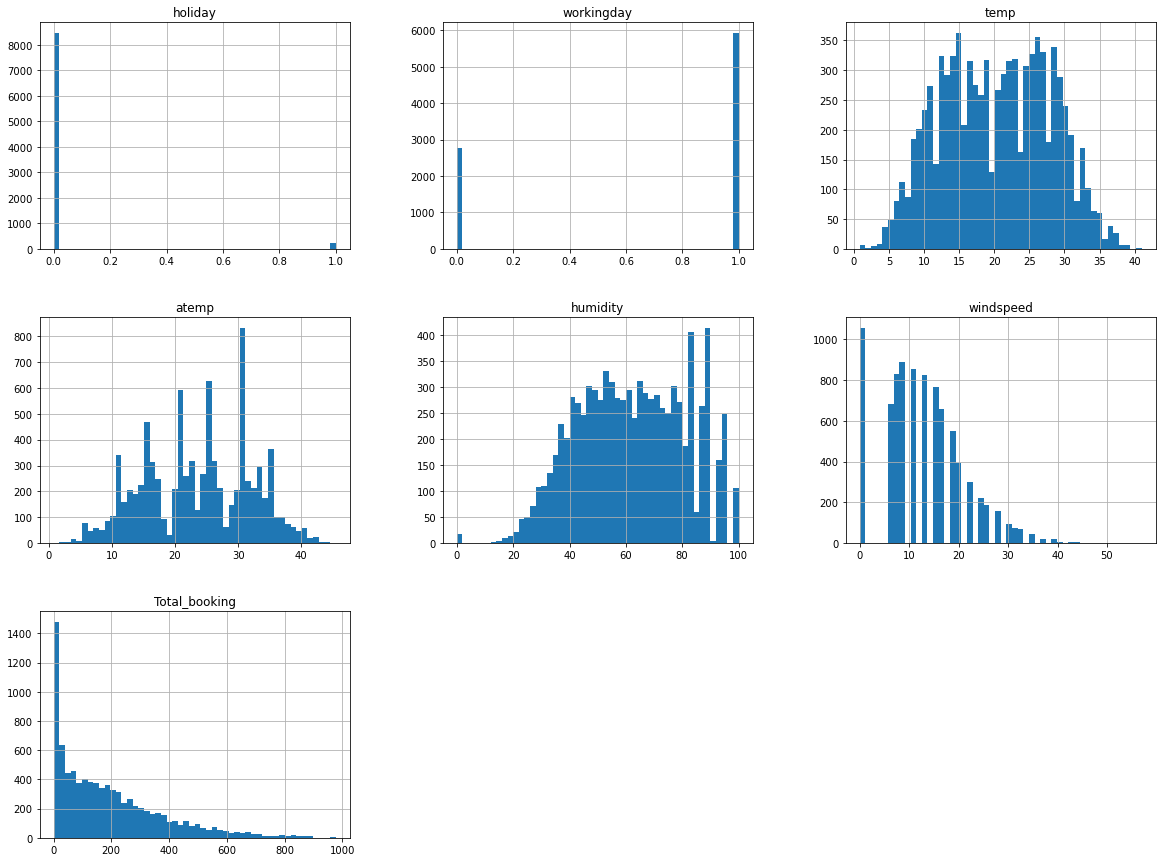

In [4]:
train.hist(bins=50, figsize=(20,15))
plt.show()

<BarContainer object of 8708 artists>

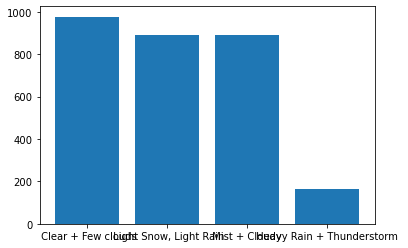

In [5]:
plt.bar(train["weather"],train["Total_booking"])


Insight-1 

Most no. of cabs are booked when the weather is "clear+Few clouds"

<BarContainer object of 8708 artists>

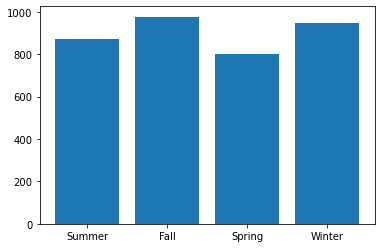

In [6]:
plt.bar(train["season"],train["Total_booking"])

Insight-2 

Most no.of cabs are booked during the season of fall

2.**Outlier Analysis** 

In [7]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [8]:
# We will do outlier analysis of "Total_booking" column

sorted(train["Total_booking"])
q1, q3 = np.percentile(train["Total_booking"],[25,75])
iqr=round(q3-q1,1)

q1,q3,iqr   

(43.0, 286.0, 243.0)

In [9]:
lower_bound = q1 -(1.5 * iqr) 

upper_bound = q3 +(1.5 * iqr) 

lower_bound,upper_bound

(-321.5, 650.5)

In [10]:
outliers=[]
for dp in train["Total_booking"]:
    if(dp>upper_bound or dp<lower_bound):
          outliers.append(dp)

len(outliers)

242

In [11]:
print(outliers)

[791, 813, 872, 790, 669, 712, 672, 653, 662, 729, 783, 672, 686, 677, 757, 770, 749, 943, 702, 977, 668, 657, 682, 717, 744, 772, 721, 865, 706, 725, 873, 705, 900, 659, 814, 687, 655, 733, 823, 730, 868, 738, 844, 887, 715, 671, 746, 770, 682, 679, 831, 684, 719, 812, 704, 681, 680, 785, 737, 801, 897, 745, 747, 679, 814, 856, 681, 671, 715, 867, 835, 671, 810, 710, 676, 863, 666, 704, 712, 698, 744, 894, 744, 654, 692, 748, 739, 651, 925, 850, 708, 698, 771, 792, 839, 743, 869, 776, 730, 968, 678, 678, 743, 822, 886, 710, 704, 711, 858, 663, 884, 686, 665, 686, 669, 656, 872, 689, 782, 706, 694, 713, 825, 687, 842, 671, 681, 723, 678, 891, 652, 692, 673, 713, 851, 852, 767, 917, 843, 813, 948, 848, 653, 795, 673, 810, 772, 651, 738, 757, 854, 794, 690, 674, 759, 656, 654, 686, 729, 684, 670, 800, 745, 662, 839, 806, 779, 693, 678, 800, 701, 837, 832, 651, 713, 769, 774, 673, 723, 658, 822, 782, 793, 784, 680, 811, 808, 892, 788, 819, 890, 817, 797, 766, 877, 812, 835, 694, 678, 856,

3.**Missing value Analysis**

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


**the above result confirms that there are no missing values in the training data**

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       2178 non-null   object 
 1   season         2178 non-null   object 
 2   holiday        2178 non-null   int64  
 3   workingday     2178 non-null   int64  
 4   weather        2178 non-null   object 
 5   temp           2178 non-null   float64
 6   atemp          2178 non-null   float64
 7   humidity       2178 non-null   int64  
 8   windspeed      2178 non-null   float64
 9   Total_booking  2178 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 170.3+ KB


*the above result confirms that there are no missing values in the test data also.*

4.**Visualizing Total_booking Vs other features to generate insights** 


*Total_booking Vs. weather is compared through a bar chart*

<AxesSubplot:xlabel='weather'>

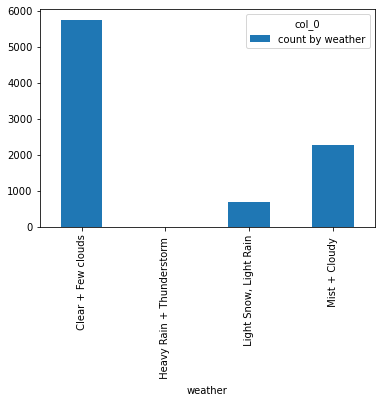

In [14]:
weather_tab = pd.crosstab(index=train["weather"],columns="count by weather")
weather_tab.plot.bar()

*Total_booking Vs. season is visualized through a bar chart*

<AxesSubplot:xlabel='season'>

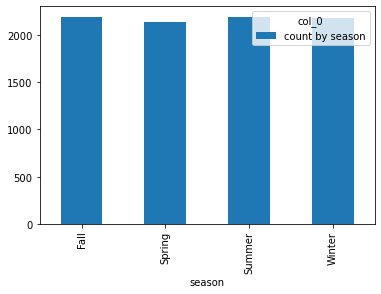

In [15]:
season_tab = pd.crosstab(index=train["season"],columns="count by season")
season_tab.plot.bar()

*Total_booking Vs. temp is compared through a bar chart*

<AxesSubplot:xlabel='windspeed'>

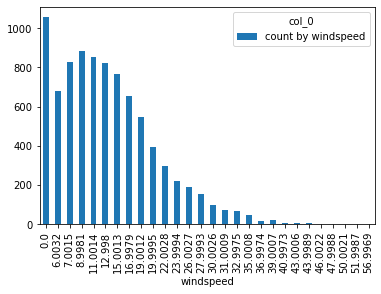

In [16]:
temp_tab = pd.crosstab(index=train["windspeed"],columns="count by windspeed")
temp_tab.plot.bar()

5.**Correlation Analysis** 

*We will use a heatmap to perform correlation analysis* 

<AxesSubplot:>

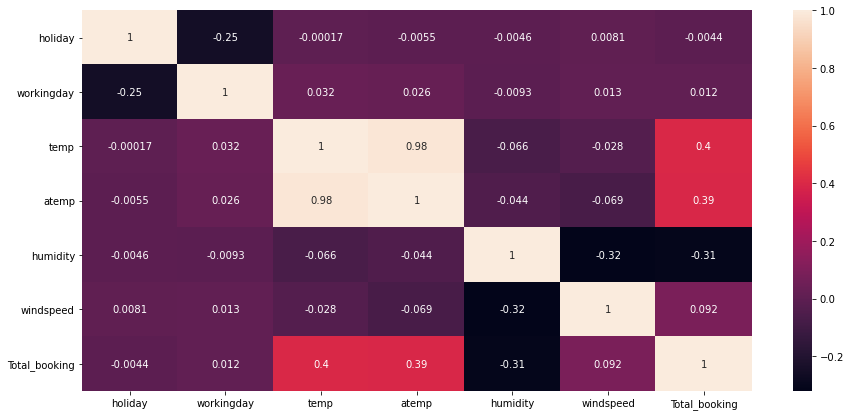

In [17]:
import matplotlib
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(train.corr(),annot=True)

the features "temp" and "atemp" have the highest correlation to the "Total_booking" column 
with an approximate pearson coefficient of 0.4

now, we will find the exact pearson coefficient and p-value between "Total_booking" column with "temp" and "atemp" column 

In [18]:
from scipy import stats

# correlation with "temp" column
pearson_coef1,p_val1= stats.pearsonr(train["Total_booking"],train["temp"])
round(pearson_coef1,3),p_val1

(0.397, 0.0)

In [19]:
# correlation with "atemp" column
pearson_coef2,p_val2= stats.pearsonr(train["Total_booking"],train["atemp"])
round(pearson_coef2,3),p_val2

(0.393, 4.06537e-319)

The exact values of pearson coefficient for "temp" and "atemp" are 0.397 and 0.393 respectively
which is close to their predicted value of 0.4 

The p-value for "temp" is 0 which means there is no relationship between "Total_booking" and "temp" columns
The p-value for "atemp" is 4.06537e-319 which means there is a weak relationship between "Total_booking" and "temp" columns

## Task-2:

1.**Feature Engineering**

Feature engineering is the process of transforming raw data into features that better represent 
the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

In [20]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
train_prep = train.copy()
test_prep = test.copy()

train_prep["weather"] = LE.fit_transform(train_prep["weather"])
train_prep["season"] =  LE.fit_transform(train_prep["season"])
train_prep = train_prep.drop(["holiday"],axis=1)

test_prep["weather"] =  LE.fit_transform(test_prep["weather"])
test_prep["season"] =  LE.fit_transform(test_prep["season"])
test_prep = test_prep.drop(["holiday"],axis=1)

train_prep.head()

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,2,1,0,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,0,1,0,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,1,1,0,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,3,1,0,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,0,1,0,30.34,33.335,51,19.0012,184


In [21]:
test_prep.head()

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,2,1,0,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,2,0,0,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,1,0,1,11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,3,1,2,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,2,0,0,25.42,31.060,43,23.9994,668


In [22]:
from dateutil.parser import parse
htn=[]
for string in train_prep["datetime"]:
    dt = parse(string)
    htn.append(dt.hour)

train = train_prep.drop(["datetime"],axis=1)
train["hours"] = htn

train

,season,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,hours
0,2,1,0,22.14,25.760,77,16.9979,504,19
1,0,1,0,28.70,33.335,79,19.0012,5,4
2,1,1,0,5.74,6.060,50,22.0028,139,9
3,3,1,0,13.94,16.665,29,8.9981,209,16
4,0,1,0,30.34,33.335,51,19.0012,184,13
...,...,...,...,...,...,...,...,...,...
8703,1,0,0,4.10,6.820,54,6.0032,13,6
8704,3,1,3,16.40,20.455,87,0.0000,11,1
8705,2,1,3,23.78,27.275,56,8.9981,1,3
8706,3,1,3,11.48,13.635,61,16.9979,92,1


In [23]:
htt=[]
for string in test_prep["datetime"]:
    dt = parse(string)
    htt.append(dt.hour)

test = test_prep.drop(["datetime"],axis=1)
test["hours"] = htt

test.head()

,season,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,hours
0,2,1,0,21.32,25.000,48,35.0008,256,11
1,2,0,0,23.78,27.275,64,7.0015,87,7
2,1,0,1,11.48,12.120,100,27.9993,11,20
3,3,1,2,25.42,28.790,83,0.0000,84,11
4,2,0,0,25.42,31.060,43,23.9994,668,12


In [24]:
X_train= train.drop(["Total_booking"],axis=1)
Y_train= train["Total_booking"]
X_test =  test.drop(["Total_booking"],axis=1)
Y_test =  test["Total_booking"]


from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()
X_train = pd.DataFrame(MS.fit_transform(X_train))
X_test =  pd.DataFrame(MS.transform(X_test))

X_train

,0,1,2,3,4,5,6,7
0,0.666667,1.0,0.0,0.530612,0.559347,0.77,0.298225,0.826087
1,0.000000,1.0,0.0,0.693878,0.728829,0.79,0.333373,0.173913
2,0.333333,1.0,0.0,0.122449,0.118581,0.50,0.386035,0.391304
3,1.000000,1.0,0.0,0.326531,0.355856,0.29,0.157870,0.695652
4,0.000000,1.0,0.0,0.734694,0.728829,0.51,0.333373,0.565217
...,...,...,...,...,...,...,...,...
8703,0.333333,0.0,0.0,0.081633,0.135586,0.54,0.105325,0.260870
8704,1.000000,1.0,1.0,0.387755,0.440653,0.87,0.000000,0.043478
8705,0.666667,1.0,1.0,0.571429,0.593243,0.56,0.157870,0.130435
8706,1.000000,1.0,1.0,0.265306,0.288064,0.61,0.298225,0.043478


In [25]:
X_test

,0,1,2,3,4,5,6,7
0,0.666667,1.0,0.000000,0.510204,0.542343,0.48,0.614083,0.478261
1,0.666667,0.0,0.000000,0.571429,0.593243,0.64,0.122840,0.304348
2,0.333333,0.0,0.333333,0.265306,0.254167,1.00,0.491243,0.869565
3,1.000000,1.0,0.666667,0.612245,0.627140,0.83,0.000000,0.478261
4,0.666667,0.0,0.000000,0.612245,0.677928,0.43,0.421065,0.521739
...,...,...,...,...,...,...,...,...
2173,0.333333,1.0,0.000000,0.448980,0.491442,0.63,0.456213,0.130435
2174,0.333333,1.0,0.666667,0.326531,0.372860,0.81,0.122840,0.521739
2175,0.333333,1.0,0.000000,0.448980,0.491442,0.59,0.350888,0.956522
2176,0.666667,1.0,0.000000,0.408163,0.457546,0.94,0.157870,0.217391


2.**Regression Analysis** 

You must predict the total count of cabs booked in each hour covered by the test set, 
using the information available prior to the booking period. 

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
print("Intercept: {}".format(lr.intercept_))
print("Coefficient: {}".format(lr.coef_))
print("Training set score: {:.2f}".format(lr.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, Y_test)))

Intercept: 12.263443933802364
Coefficient: [ 7.52716738e+01 -1.50824064e+00  7.81075159e+00  2.92729810e+02
  8.52762804e+01 -2.10119856e+02 -1.10300429e-01  1.70762822e+02]
Training set score: 0.34
Test set score: 0.35


In [28]:
from sklearn.metrics import mean_squared_error,r2_score
Y_pred = lr.predict(X_test)
lin_rmse =  mean_squared_error(Y_test,Y_pred,squared=False)
lin_rmse

144.5654262661251

In [29]:
accuracy_lr = r2_score(Y_test,Y_pred)
accuracy_lr

0.3505756056299041

In [30]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=20.0).fit(X_train,Y_train)

print("ridge intercept: {}".format(ridgereg.intercept_))
print("ridge coefficient: {}".format(ridgereg.coef_))
print("Ridge Training set score: {:.2f}".format(ridgereg.score(X_train, Y_train)))
print("Ridge Test set score: {:.2f}".format(ridgereg.score(X_test, Y_test)))

ridge intercept: 9.48936335877005
ridge coefficient: [  69.75868232   -1.0416334     5.58880875  203.42815481  162.05413149
 -196.53353476    8.39748944  169.69004827]
Ridge Training set score: 0.34
Ridge Test set score: 0.35


In [31]:
from sklearn.linear_model import Lasso
lsoreg = Lasso().fit(X_train,Y_train)

print("Lasso intercept: {}".format(lsoreg.intercept_))
print("lasso coefficient: {}".format(lsoreg.coef_))
print("Lasso Training set score: {:.2f}".format(lsoreg.score(X_train, Y_train)))
print("Lasso Test set score: {:.2f}".format(lsoreg.score(X_test, Y_test)))
print("Number of features used: {}".format(np.sum(lsoreg.coef_ != 0)))

Lasso intercept: 20.837987900616724
lasso coefficient: [  61.06494481   -0.            0.          285.42159455   56.28843461
 -178.1011222     0.          167.94700544]
Lasso Training set score: 0.34
Lasso Test set score: 0.35
Number of features used: 5


In [32]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
KNR.fit(X_train,Y_train)
print("Train set R^2: {:.2f}".format(KNR.score(X_train, Y_train)))
print("Test set R^2: {:.2f}".format(KNR.score(X_test, Y_test)))

Train set R^2: 0.83
Test set R^2: 0.68


K-nearest neighbors showed a better R^2 score on the train and test set, so i will evaluate the prediction acuracy of this model.

In [33]:
Ypred_KNR = KNR.predict(X_test)  
print("prediction accuracy score R^2 : {:.2f}".format(r2_score(Y_test,Ypred_KNR)))

prediction accuracy score R^2 : 0.68


In [34]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

print("Train set R^2: {:.2f}".format(DTR.score(X_train, Y_train)))
print("Test set R^2: {:.2f}".format(DTR.score(X_test, Y_test)))

Train set R^2: 1.00
Test set R^2: 0.68


Decision tree regressor also showed a better R^2 score on the train and test set, so i will evaluate the prediction acuracy of this model.

In [35]:
Ypred_DTR = DTR.predict(X_test)
print("prediction accuracy score R^2 : {:.2f}".format(r2_score(Y_test,Ypred_DTR)))

prediction accuracy score R^2 : 0.68


On performing Regression Analysis, we observe that on applying three linear models, the R2 score for training and test sets 
are 0.34 and 0.35, which is a quite low score. This gives us the insight that linear models are not the suitable model for
the given dataset, because most of the features do not have a strong linear relationship with the target variable.

On the other hand, the other regression models namely K-NearestNeighboursRegressor and DecisionTreeRegressor give a way better 
R2 score of 0.68 and 0.69 on the test set.


3.**Grid search** 

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [37]:
Ypred_rf = rf.predict(X_test)
accuracy_score = r2_score(Y_test,Ypred_rf)
accuracy_score

0.8370835912537173

In [38]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {'max_depth': [5,10,20],'min_samples_leaf': [1,2,4],'n_estimators': [150,200,250]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [150, 200, 250]})

In [39]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=250,
                      random_state=42)

4.**Ensemble Model** 

In [40]:
RFR2 =RandomForestRegressor(max_depth=20,min_samples_leaf=2,n_estimators=250,random_state=42)
RFR2.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=250,
                      random_state=42)

In [41]:
Ypred_RFR = RFR2.predict(X_test)
accuracy_score2 = r2_score(Y_test,Ypred_RFR)
accuracy_score2

0.8414282709056182

**Conclusion**

As we can see above the accuracy of the ensemble model RandomForestRegressor is way better than all other models, and there is also a bit of a improvement after doing hyperparameter optimization using GridsearchCV. 

the accuracy_score was 35% for linear models, then it rose to 68%,69% for K-nearest_neighbors and finally the model achieved 84% accuracy from the ensemble based randomforest algorithm.